# **Sign Language Recognition using CNN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout, BatchNormalization, MaxPool2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.optimizers import SGD

In [3]:
train = pd.read_csv('/content/drive/My Drive/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/sign_mnist_test.csv')

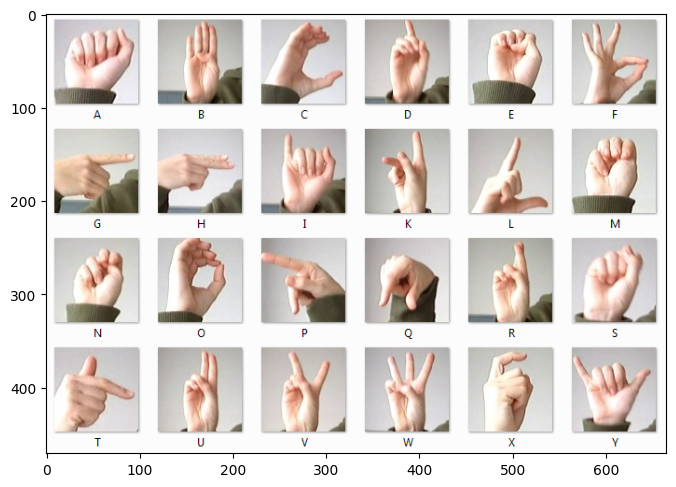

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8 ,8))
img = plt.imread('/content/drive/My Drive/amer_sign2.png')
plt.imshow(img)
plt.show()

In [5]:
train.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,14,167,169,170,171,171,172,172,172,171,...,215,215,211,208,211,201,167,119,75,48
27446,19,133,135,138,141,143,144,144,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,11,170,172,175,177,179,182,185,186,187,...,221,228,229,228,229,229,227,228,227,227
27448,12,149,151,153,157,159,161,164,165,168,...,108,165,167,163,159,153,147,148,139,196


In [6]:
test.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,10,130,131,131,134,133,135,137,136,136,...,128,106,107,63,11,147,194,182,176,124
7163,4,158,161,165,169,172,175,177,179,181,...,78,122,141,141,141,140,141,142,143,144
7164,14,141,144,146,149,153,156,158,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,8,158,160,160,161,161,161,164,162,162,...,177,178,176,174,173,172,171,169,169,167


In [7]:
pd.DataFrame({
    'X': ['Shape','Different number of labels','Different number of labels (Sum)'],
    'Training Set': [train.shape, train.label.unique(), len(train.label.unique())],
    'Test Set': [test.shape, test.label.unique(), len(test.label.unique())],
})

,X,Training Set,Test Set
0,Shape,"(27455, 785)","(7172, 785)"
1,Different number of labels,"[3, 6, 2, 13, 16, 8, 22, 18, 10, 20, 17, 19, 2...","[6, 5, 10, 0, 3, 21, 14, 7, 8, 12, 4, 22, 2, 1..."
2,Different number of labels (Sum),24,24


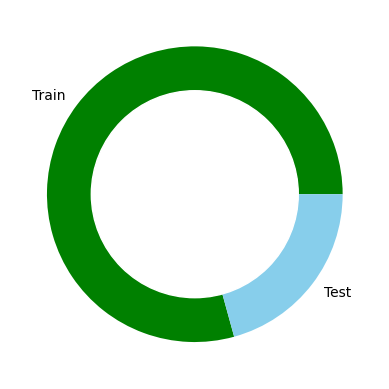

In [ ]:
import matplotlib.pyplot as plt

# Data
train_len = len(train)
test_len = len(test)
total = train_len + test_len
train_percent = train_len / total * 100
test_percent = test_len / total * 100

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie([train_len, test_len], labels=["Train", "Test"], colors=['green', 'skyblue'], autopct='%1.1f%%')

# Draw white circle in the middle
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(my_circle)

plt.title('Train-Test Data Split')
plt.show()


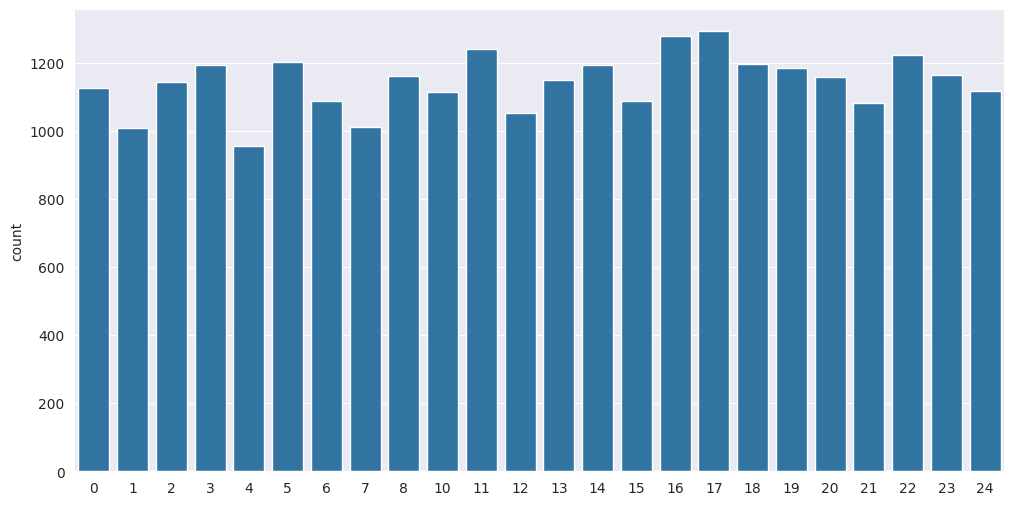

In [9]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.countplot(x=train['label'].values)
plt.show()

In [10]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

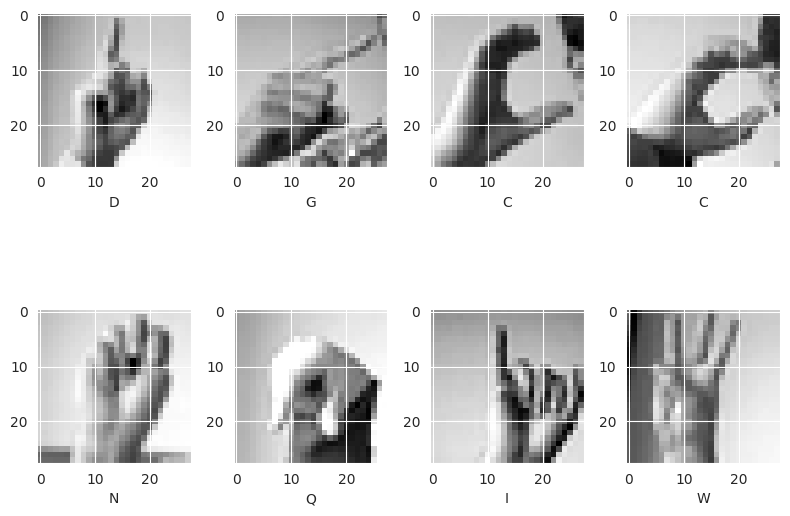

In [11]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = X_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(y_train[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

In [12]:
X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [13]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 28, 28, 1)
X_test shape:  (7172, 28, 28, 1)


In [ ]:
#Model 1

In [14]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same'
                        ,input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 16)          0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 3, 3, 128)         2

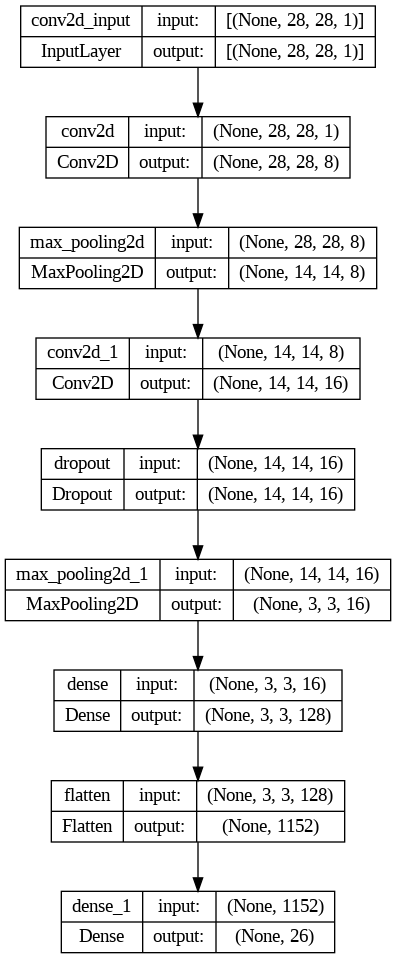

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model1.png')
from IPython.display import Image
Image(retina=True, filename='model1.png')

In [ ]:
#Model 2

In [17]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' ,
                 activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 26 , activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)       

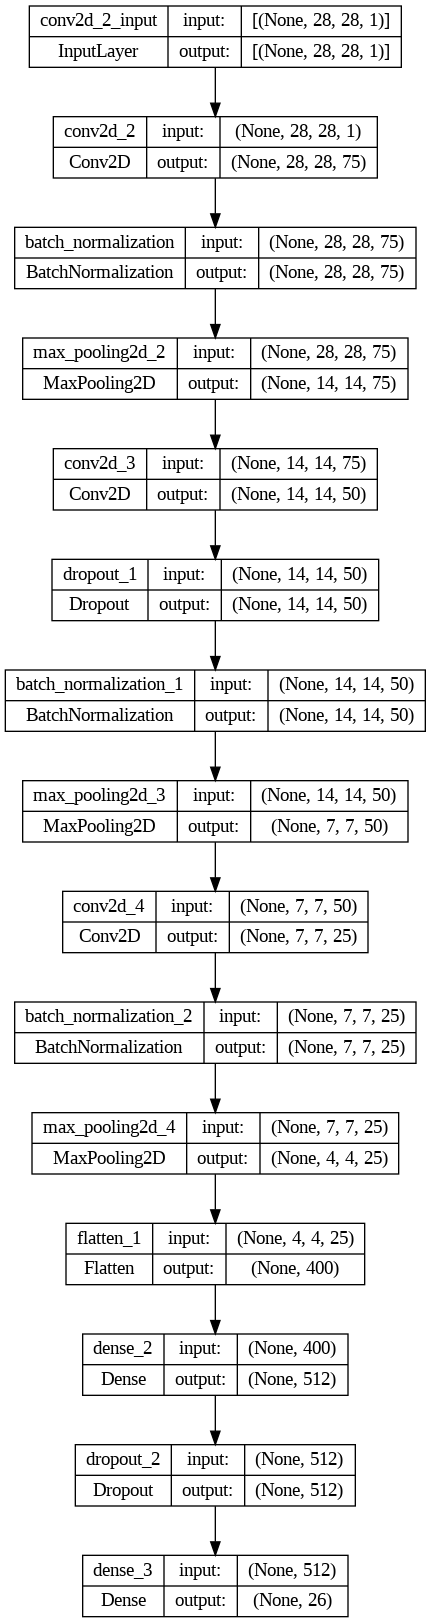

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')
from IPython.display import Image
Image(retina=True, filename='model2.png')

In [20]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
275/275 [==============================] - 8s 5ms/step - loss: 3.8048 - accuracy: 0.4062
Epoch 2/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7034 - accuracy: 0.7641
Epoch 3/50
275/275 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.8495
Epoch 4/50
275/275 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 0.8801
Epoch 5/50
275/275 [==============================] - 1s 4ms/step - loss: 0.2666 - accuracy: 0.9071
Epoch 6/50
275/275 [==============================] - 1s 5ms/step - loss: 0.2445 - accuracy: 0.9138
Epoch 7/50
275/275 [==============================] - 1s 5ms/step - loss: 0.2079 - accuracy: 0.9292
Epoch 8/50
275/275 [==============================] - 2s 6ms/step - loss: 0.1800 - accuracy: 0.9372
Epoch 9/50
275/275 [==============================] - 1s 5ms/step - loss: 0.1640 - accuracy: 0.9449
Epoch 10/50
275/275 [==============================] - 1s 4ms/step - loss: 0.1464 - accuracy: 0.9505

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
275/275 [==============================] - 6s 11ms/step - loss: 0.5506 - accuracy: 0.8420
Epoch 2/50
275/275 [==============================] - 3s 11ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 3/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 4/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0083 - accuracy: 0.9977
Epoch 5/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0119 - accuracy: 0.9965
Epoch 6/50
275/275 [==============================] - 3s 11ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 7/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 8/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 9/50
275/275 [==============================] - 3s 11ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 10/50
275/275 [==============================] - 3s 10ms/step - loss: 0.0075 - accura

In [22]:
metrics = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Loss of model 1: ",metrics[0])
print("Accuracy of model 1: ",metrics[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.9232
Loss of model 1:  0.3437545895576477
Accuracy of model 1:  92.31734275817871 %


In [23]:
metrics = model.evaluate(x=X_test,y=y_test,batch_size=32)
print("Loss of model 2: ",metrics[0])
print("Accuracy of model 2: ",metrics[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9657
Loss of model 2:  0.22461523115634918
Accuracy of model 2:  96.56999707221985 %


In [24]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

225/225 [==============================] - 1s 3ms/step


In [25]:
y_test_flat = np.argmax(y_test, axis=1)

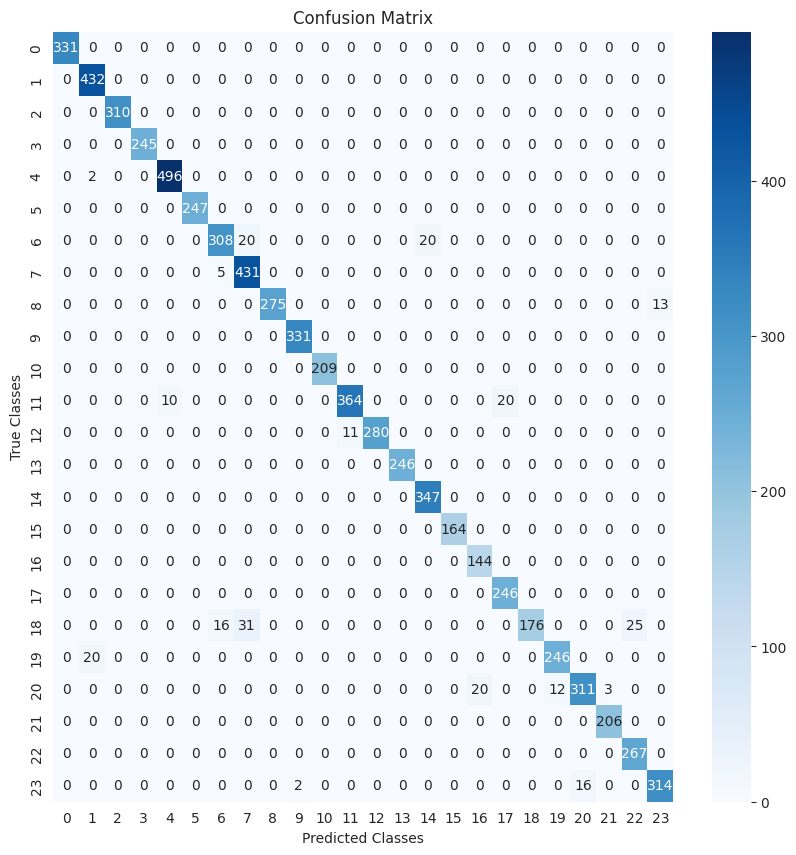

In [26]:
# Now you can proceed with the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

CM = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(CM, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

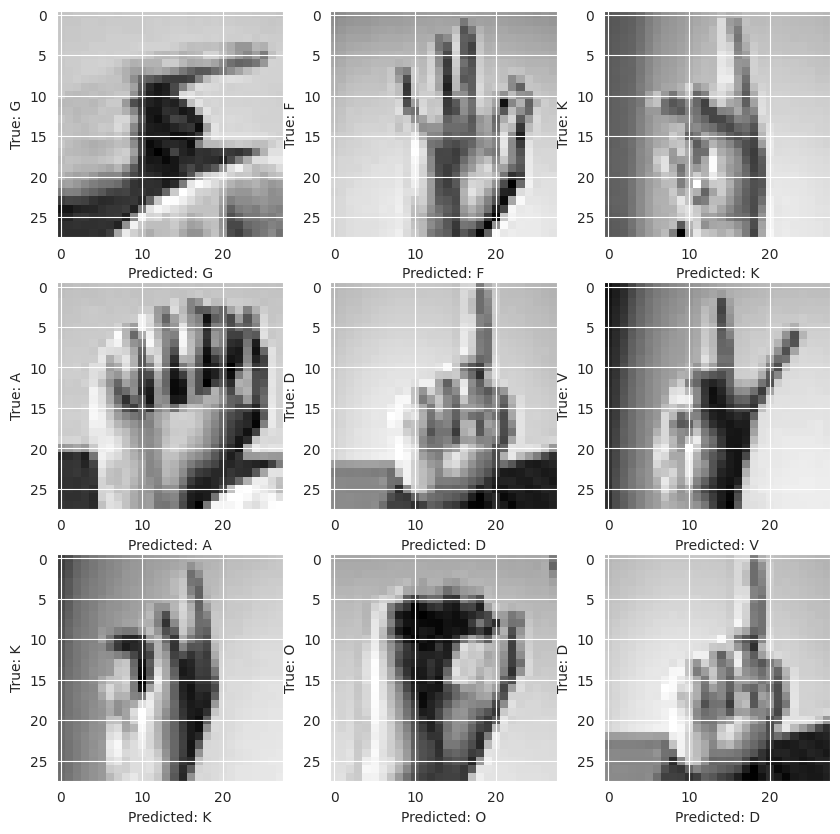

In [27]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {chr(y_test_flat[i] + 65)}")
    plt.xlabel(f"Predicted: {chr(y_pred[i] + 65)}")

plt.show()

In [ ]:
# Download the model

model.save('sign_language_model.h5')

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import tensorflow.keras.models as keras_models

# Load the Keras model
keras_model = keras_models.load_model('sign_language_model.h5')

# Define a corresponding PyTorch model architecture
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Define the architecture of your model
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.fc1 = nn.Linear(128, 10)

         # Retrieve the layer names and their corresponding Keras layers
        self.layer_names = [layer.name for layer in keras_model.layers]
        self.keras_layers = keras_model.layers
    
    def forward(self, x):
        # Define the forward pass of your model
        # Iterate through layers and apply them sequentially
        for name, layer in zip(self.layer_names, self.keras_layers):
            x = layer(x)
        return x

# Create an instance of the PyTorch model
pytorch_model = CustomModel()

# Save the PyTorch model in .pt format
torch.save(pytorch_model.state_dict(), 'model.pt')
